# Demand Forecasting

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from pandas import Series ,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10, 6
import warnings
warnings.filterwarnings('ignore')

# Data Description

In [2]:
train_data=pd.read_csv(r'G:\internship\train.csv')
train_data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
test_data=pd.read_csv(r'G:\internship\test (1).csv')
test_data.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [4]:
train_data.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [5]:
test_data.describe()

,id,store,item
count,45000.000000,45000.000000,45000.00000
mean,22499.500000,5.500000,25.50000
std,12990.525394,2.872313,14.43103
min,0.000000,1.000000,1.00000
25%,11249.750000,3.000000,13.00000
50%,22499.500000,5.500000,25.50000
75%,33749.250000,8.000000,38.00000
max,44999.000000,10.000000,50.00000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [8]:
train_data.shape

(913000, 4)

In [9]:
test_data.shape

(45000, 4)

In [10]:
# Time Range
train_data["date"].min(), train_data["date"].max(), test_data["date"].min(), test_data["date"].max()

('2013-01-01', '2017-12-31', '2018-01-01', '2018-03-31')

In [11]:
train_data.groupby(["store"])["item"].nunique()

store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

In [12]:
# Summary Stats for each store
train_data.groupby(["store"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})

sales                                               
       count      sum       mean median        std min  max
store                                                      
1      91300  4315603  47.268379   44.0  24.006252   1  155
2      91300  6120128  67.033165   62.0  33.595810   3  231
3      91300  5435144  59.530602   55.0  29.974102   3  196
4      91300  5012639  54.902946   51.0  27.733097   4  186
5      91300  3631016  39.770164   37.0  20.365757   2  130
6      91300  3627670  39.733516   37.0  20.310451   0  134
7      91300  3320009  36.363735   34.0  18.684825   1  122
8      91300  5856169  64.142048   60.0  32.231751   4  204
9      91300  5025976  55.049025   51.0  27.832186   4  195
10     91300  5360158  58.709288   54.0  29.554994   3  187

In [13]:
# Summary Stats for each item
train_data.groupby(["item"]).agg({"sales": ["count","sum", "mean", "median", "std", "min", "max"]})

sales                                               
      count      sum       mean median        std min  max
item                                                      
1     18260   401384  21.981599   21.0   8.468922   1   59
2     18260  1069564  58.574151   56.0  20.093015   9  150
3     18260   669087  36.642223   35.0  13.179441   7  104
4     18260   401907  22.010241   21.0   8.403898   0   66
5     18260   335230  18.358708   18.0   7.265167   1   50
6     18260  1068281  58.503888   56.0  20.174898  11  148
7     18260  1068777  58.531051   56.0  20.146002  11  141
8     18260  1405108  76.950055   74.0  26.130697  15  181
9     18260   938379  51.389869   49.5  17.790158   6  134
10    18260  1337133  73.227437   70.0  24.823725  14  175
11    18260  1271925  69.656353   67.0  23.744732  11  170
12    18260  1271534  69.634940   67.0  23.738663  12  170
13    18260  1539621  84.316594   81.0  28.311031  20  210
14    18260  1071531  58.681873   56.0  20.079860  12  152
15    18260  1607442  88.030778   85.0  29.522852  17  231
16    18260   468480  25.656079   25.0   9.603270   2   70
17    18260   602486  32.994852   32.0  11.967610   4   83
18    18260  1538876  84.275794   81.0  28.430621  18  208
19    18260   736892  40.355531   39.0  14.332645   5   99
20    18260   867641  47.515936   46.0  16.490487   9  127
21    18260   736190  40.317087   39.0  14.338006   7  109
22    18260  1469971  80.502245   78.0  27.118163  14  214
23    18260   534979  29.297864   28.0  10.819549   3   81
24    18260  1205975  66.044633   64.0  22.531555  14  156
25    18260  1473334  80.686418   78.0  27.238817  18  193
26    18260   869981  47.644085   46.0  16.723912   8  119
27    18260   402628  22.049726   21.0   8.461641   1   59
28    18260  1604713  87.881325   85.0  29.501781  16  206
29    18260  1271240  69.618839   67.0  23.635631  15  173
30    18260   736554  40.337021   39.0  14.363331   5  115
31    18260  1070845  58.644304   57.0  20.104705  10  159
32    18260   803107  43.981763   42.0  15.574556   5  119
33    18260  1270183  69.560953   67.0  23.718343  15  169
34    18260   469935  25.735761   25.0   9.617910   2   79
35    18260  1201541  65.801807   63.0  22.461990  12  168
36    18260  1406548  77.028916   74.0  26.067440  16  188
37    18260   534258  29.258379   28.0  10.771547   3   74
38    18260  1470330  80.521906   77.0  27.141799  15  188
39    18260   801311  43.883406   42.0  15.511550   7  112
40    18260   534094  29.249398   28.0  10.822959   3   74
41    18260   401759  22.002136   21.0   8.402470   2   60
42    18260   669925  36.688116   35.0  13.215112   5   96
43    18260   936635  51.294359   49.0  17.801008   9  126
44    18260   536811  29.398193   28.0  10.797738   3   78
45    18260  1471467  80.584173   78.0  27.318402  18  205
46    18260  1070764  58.639869   56.0  20.220879  11  150
47    18260   401781  22.003341   21.0   8.420102   2   61
48    18260   937703  51.352848   49.0  17.881917   8  130
49    18260   535663  29.335323   28.0  10.874788   3   77
50    18260  1203009  65.882202   63.0  22.416031  12  164

In [14]:
train_data.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [15]:
test_data.dtypes

id        int64
date     object
store     int64
item      int64
dtype: object

In [16]:
train_data.dtypes.value_counts()

int64     3
object    1
dtype: int64

In [17]:
test_data.dtypes.value_counts()

int64     3
object    1
dtype: int64

In [18]:
train_data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [19]:
test_data.columns

Index(['id', 'date', 'store', 'item'], dtype='object')

In [20]:
train_data.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [21]:
test_data.isna().sum()

id       0
date     0
store    0
item     0
dtype: int64

In [22]:
train_data.apply(lambda x:len(x.unique()))

date     1826
store      10
item       50
sales     213
dtype: int64

In [23]:
test_data.apply(lambda x:len(x.unique()))

id       45000
date        90
store       10
item        50
dtype: int64

In [24]:
duplicate=train_data[train_data.duplicated()]
duplicate.shape

(0, 4)

In [25]:
duplicate=test_data[test_data.duplicated()]
duplicate.shape

(0, 4)

# EDA

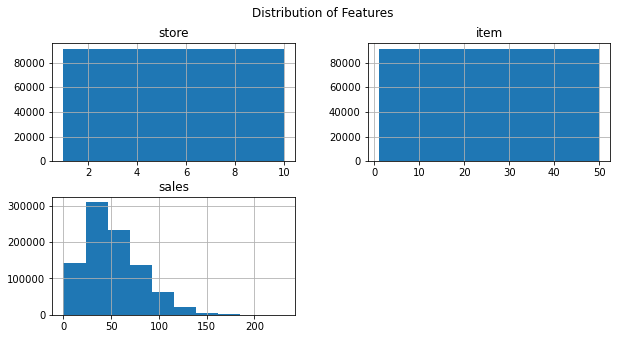

In [26]:
train_data.hist(figsize=(10,5))
plt.suptitle('Distribution of Features')
plt.show()

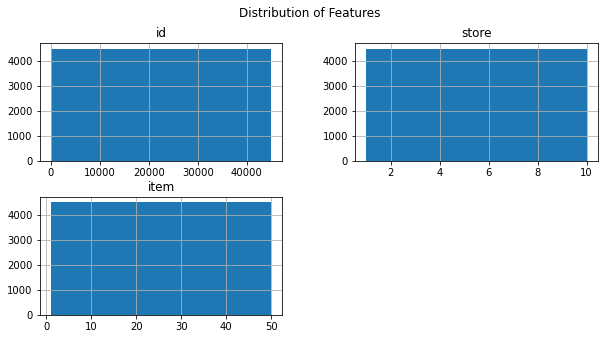

In [27]:
test_data.hist(figsize=(10,5))
plt.suptitle('Distribution of Features')
plt.show()

In [28]:
#The above is a basic summary of the data set
#Now we will do the visual analysis of each of the features

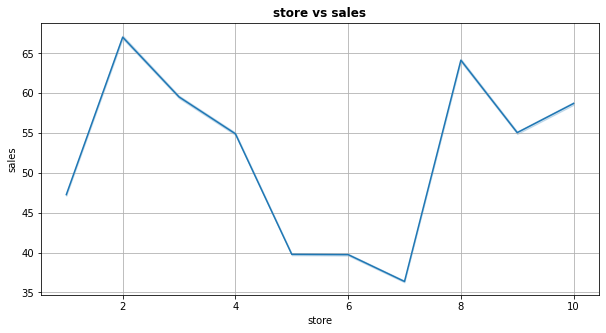

In [29]:
plt.figure(figsize=(10,5))
sns.lineplot(data=train_data,x='store',y='sales')
plt.title('store vs sales',fontweight="bold")
plt.grid()

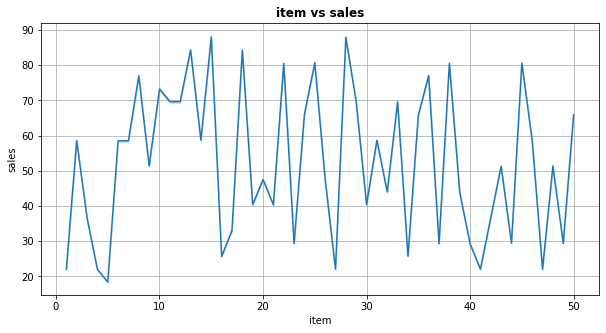

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(data=train_data,x='item',y='sales')
plt.title('item vs sales',fontweight="bold")
plt.grid()

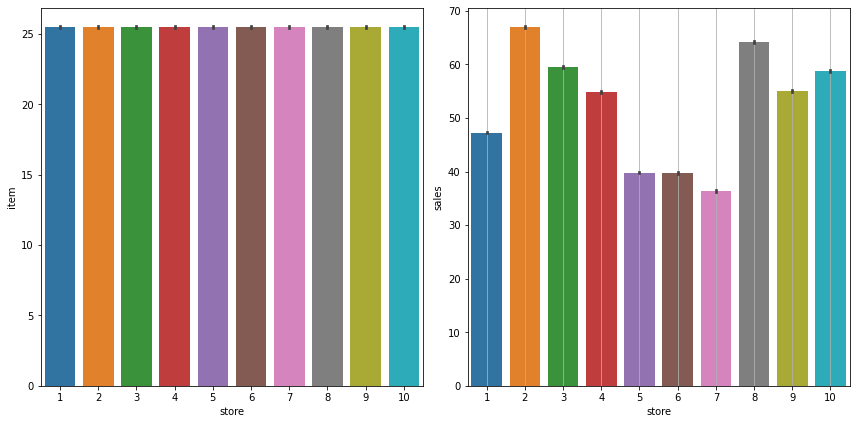

In [31]:
c=[ 'item', 'sales']
fig, ax = plt.subplots(1, 2, figsize=(12,6))

for i, subplot in zip(c,ax.flatten()):
    sns.barplot(x=train_data['store'], y= train_data[i], ax=subplot)
    plt.grid()
plt.tight_layout()

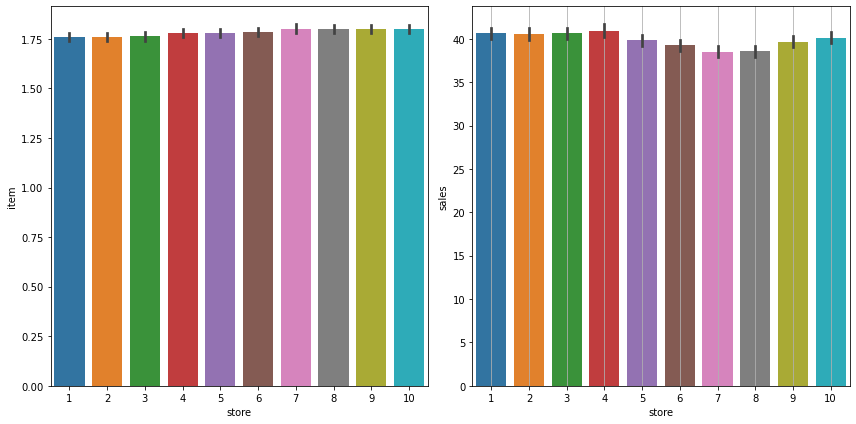

In [32]:
c=[ 'item', 'sales']
fig, ax = plt.subplots(1, 2, figsize=(12,6))

for i, subplot in zip(c,ax.flatten()):
    sns.barplot(x=test_data['store'], y= train_data[i], ax=subplot)
    plt.grid()
plt.tight_layout()

# Preprocessing

In [33]:
train_data.isnull().sum().to_frame().style.bar(color="red")

,0
date,0
store,0
item,0
sales,0


In [34]:
test_data.isnull().sum().to_frame().style.bar(color="red")

,0
id,0
date,0
store,0
item,0


In [35]:
#Since there is no values are missing in both test and train dataset there is no need of handling the missing values.
#The dataset is free from null values. 

In [36]:
train_data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

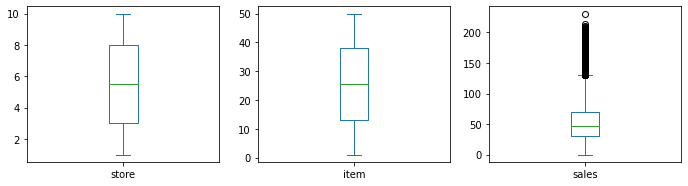

In [37]:
train_data.plot(kind="box",subplots=True,layout=(6,5),figsize=(20,20))
plt.show()

In [38]:
#Here we can see that only sales have outliers.

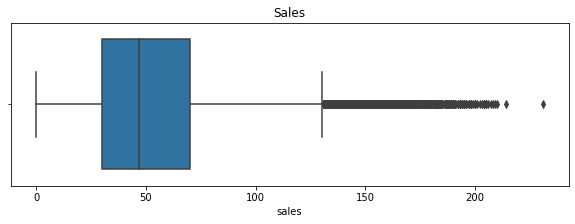

In [39]:
plt.figure(figsize=(10,3))
sns.boxplot(train_data['sales'])
plt.title('Sales')
plt.show()

In [40]:
q1=np.percentile(train_data['sales'],25,interpolation='midpoint')
q2=np.percentile(train_data['sales'],50,interpolation='midpoint')
q3=np.percentile(train_data['sales'],75,interpolation='midpoint')
iqr=q3-q1
up_lim=q3+1.5*iqr
low_lim=q1-1.5*iqr
print('\033[1;4m','Sales','\033[0m')
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('IQR:',iqr)
print('lower limit:',low_lim)
print('upper limit:',up_lim)
outlier=[]
for x in train_data['sales']:
    if ((x<low_lim) or (x>up_lim)):
        outlier.append(x)
    
train_data['sales']=np.where(train_data['sales']<low_lim,low_lim,np.where(train_data['sales']>up_lim,up_lim,train_data['sales']))
    
        

 Sales 
Q1: 30.0
Q2: 47.0
Q3: 70.0
IQR: 40.0
lower limit: -30.0
upper limit: 130.0


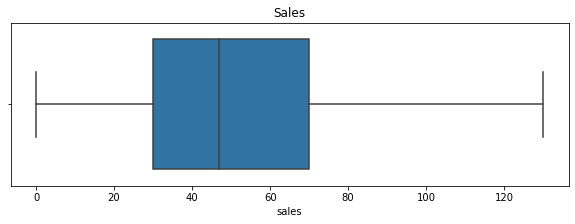

In [41]:
plt.figure(figsize=(10,3))
sns.boxplot(train_data['sales'])
plt.title('Sales')
plt.show()

In [42]:
#We can see that the outliers have been handled and have been set to the maximum value.

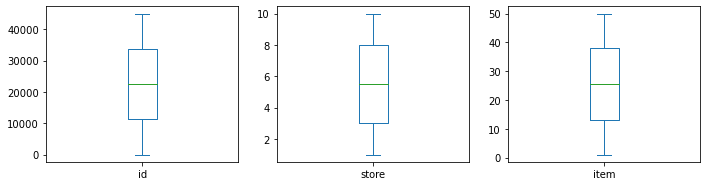

In [43]:
test_data.plot(kind="box",subplots=True,layout=(6,5),figsize=(20,20))
plt.show()

In [44]:
#It shows that there is no outliers in test dataset.
#Hence the outliers have been handled in both test and train dataset.

# 3.Feature Engineering

In [45]:
#In order to search for seasonalities, date variable will be used to derive new features and different time periods will be created
train_data['date'] = pd.to_datetime(train_data['date'], format="%Y-%m-%d")
# per 1 store, 1 item
train_df = train_data[train_data['store']==1]
train_df = train_df[train_data['item']==1]
train_df['year'] = train_data['date'].dt.year
train_df['month'] = train_data['date'].dt.month
train_df['day'] = train_data['date'].dt.dayofyear
train_df['weekday'] = train_data['date'].dt.weekday

In [46]:
train_df.head()

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13.0,2013,1,1,1
1,2013-01-02,1,1,11.0,2013,1,2,2
2,2013-01-03,1,1,14.0,2013,1,3,3
3,2013-01-04,1,1,13.0,2013,1,4,4
4,2013-01-05,1,1,10.0,2013,1,5,5


Text(0.5, 1.0, 'Stationarity checking')

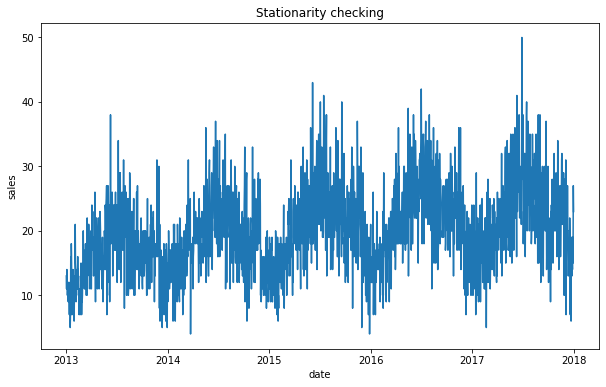

In [102]:
sns.lineplot(x="date", y="sales",legend = 'full' , data=train_df)
plt.title('Stationarity checking')

<AxesSubplot:xlabel='weekday', ylabel='sales'>

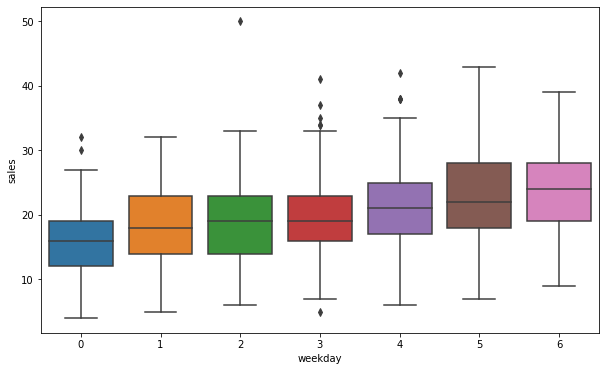

In [48]:
sns.boxplot(x="weekday", y="sales", data=train_df)

In [49]:
# More sales in weekends.0 represent Monday and 6 represents Sunday

<AxesSubplot:xlabel='month'>

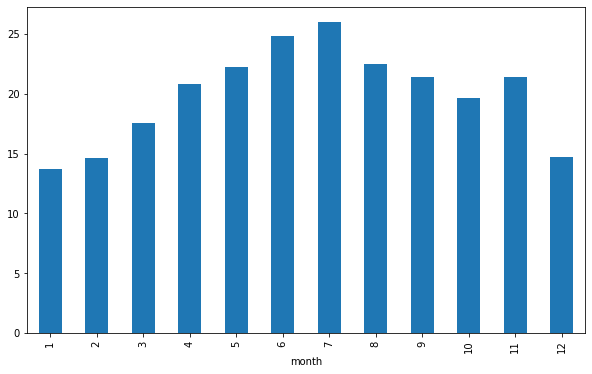

In [50]:
train_df.groupby('month')['sales'].mean().plot.bar()

In [51]:
train_data.set_index('date',inplace=True)

In [52]:
train_data

,store,item,sales
date,,,
2013-01-01,1,1,13.0
2013-01-02,1,1,11.0
2013-01-03,1,1,14.0
2013-01-04,1,1,13.0
2013-01-05,1,1,10.0
...,...,...,...
2017-12-27,10,50,63.0
2017-12-28,10,50,59.0
2017-12-29,10,50,74.0


Text(0.5, 1.0, 'After stationary')

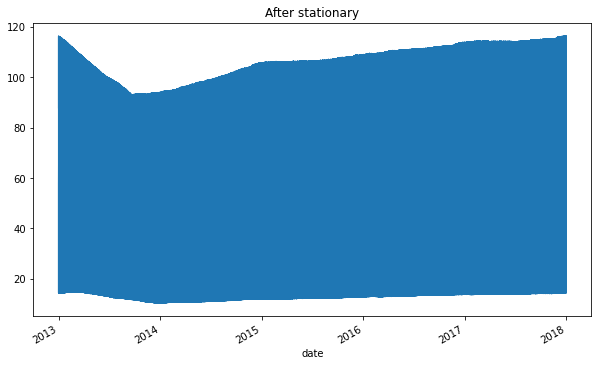

In [101]:
train_data['mov_avg'] =train_data['sales'].rolling(window=360).mean()
train_data['mov_avg'].dropna().plot(figsize=(10,6))
plt.title('After stationary')

In [54]:
test_data['date']=pd.to_datetime(test_data['date'])
test_data.set_index('date',inplace=True)
test_data.head()

,id,store,item
date,,,
2018-01-01,0,1,1
2018-01-02,1,1,1
2018-01-03,2,1,1
2018-01-04,3,1,1
2018-01-05,4,1,1


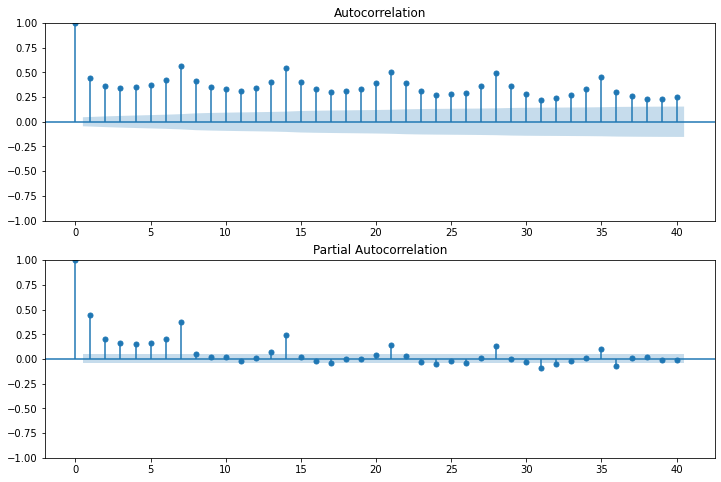

In [55]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.sales, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df.sales, lags=40, ax=ax2)# , lags=40

In [56]:
first_diff = train_df.sales - train_df.sales.shift(1)
first_diff = first_diff.dropna(inplace = False)

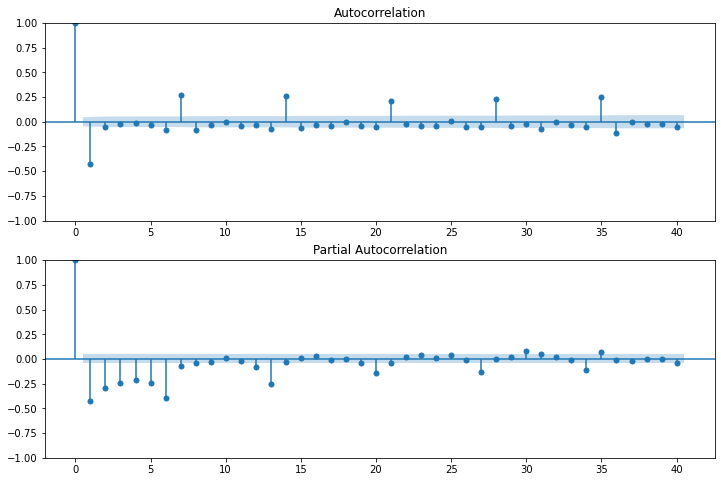

In [57]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=40, ax=ax2)

# Modelling


In [58]:
data1=train_data
data1=data1.drop([])

In [59]:
series=data1['sales'].squeeze()
type(series)

pandas.core.series.Series

In [60]:
values=pd.DataFrame(series)

In [61]:
base_model=pd.concat([values,values.shift(1)],axis=1)
base_model.head()

,sales,sales
date,,
2013-01-01,13.0,NaN
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0


In [62]:
base_model.columns=['Actual_sales','Forecasted_sales']
base_model.head()

,Actual_sales,Forecasted_sales
date,,
2013-01-01,13.0,NaN
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0


In [63]:
base_model.dropna()

,Actual_sales,Forecasted_sales
date,,
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0
2013-01-06,12.0,10.0
...,...,...
2017-12-27,63.0,41.0
2017-12-28,59.0,63.0
2017-12-29,74.0,59.0


In [64]:
base_test=base_model[1:]
base_test.head()

,Actual_sales,Forecasted_sales
date,,
2013-01-02,11.0,13.0
2013-01-03,14.0,11.0
2013-01-04,13.0,14.0
2013-01-05,10.0,13.0
2013-01-06,12.0,10.0


In [65]:
from sklearn.metrics import mean_squared_error
base_error=mean_squared_error(base_test.Actual_sales,base_test.Forecasted_sales)
base_error

189.05599568017053

In [66]:
np.sqrt(base_error)

13.749763477244636

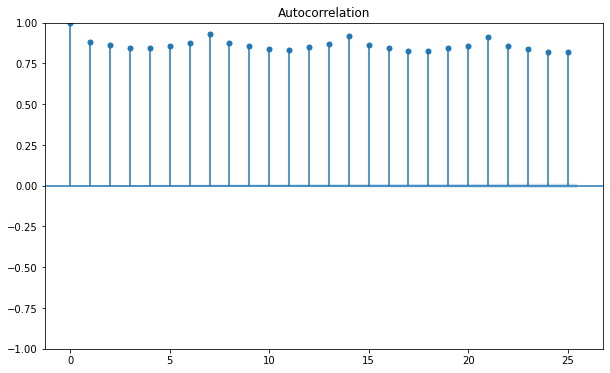

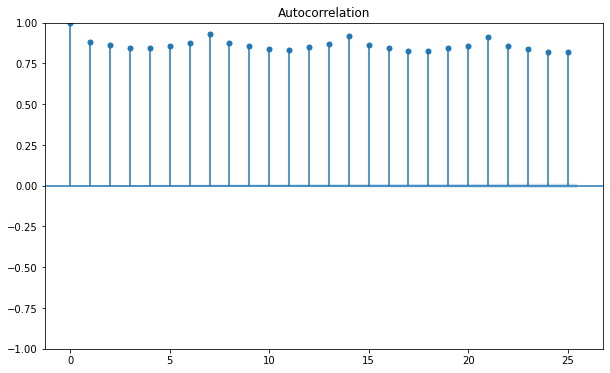

In [67]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(series,lags=25)

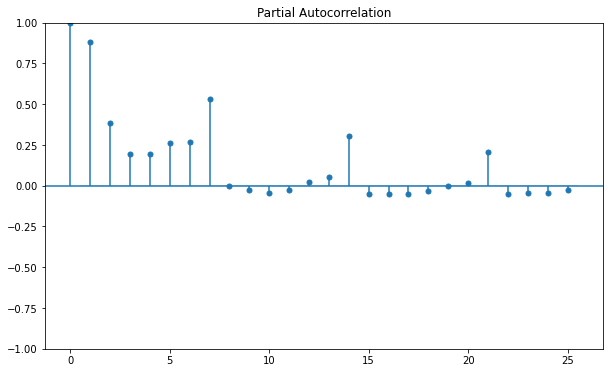

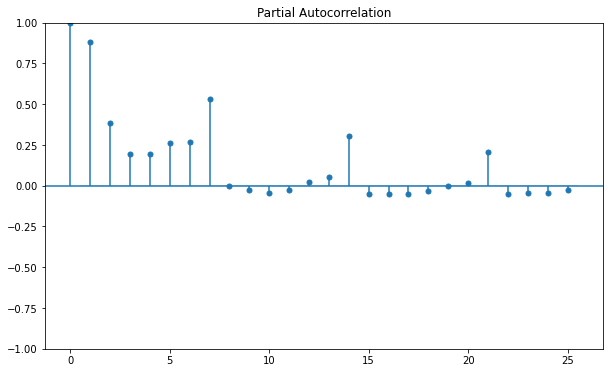

In [68]:
plot_pacf(series,lags=25)

In [69]:
train_data.columns

Index(['store', 'item', 'sales', 'mov_avg'], dtype='object')

In [70]:
train_data=train_data.drop(['mov_avg'],axis=1)

In [71]:
test=series[0:225000]
train=series[225000:912999]

In [72]:
test.size


225000

In [73]:
model = sm.tsa.arima.ARIMA(train, order=(0,1,0))
result = model.fit()
result.summary()

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:               687999
Model:                 ARIMA(0, 1, 0)   Log Likelihood            -2776663.876
Date:                Fri, 07 Oct 2022   AIC                        5553329.752
Time:                        15:46:12   BIC                        5553341.193
Sample:                             0   HQIC                       5553332.949
                             - 687999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       187.5119      0.232    809.687      0.000     187.058     187.966
===================================================================================
Ljung-Box (L1) (Q):              121466.97   Jarque-Bera (JB):            152239.24
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
start=len(train)
end=len(train)+len(test)-1
pred=result.predict(start=start,end=end,typ='levels')
print(pred)

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


687999    62.0
688000    62.0
688001    62.0
688002    62.0
688003    62.0
          ... 
912994    62.0
912995    62.0
912996    62.0
912997    62.0
912998    62.0
Name: predicted_mean, Length: 225000, dtype: float64


<AxesSubplot:xlabel='date'>

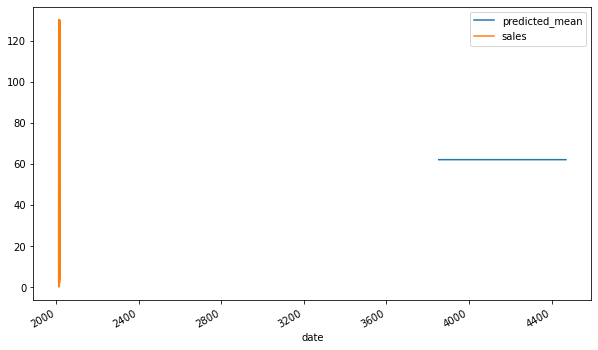

In [75]:
pred.plot(legend=True)
test.plot(legend=True)

In [76]:
test.mean()

52.24135111111111

In [77]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

29.906060924167196


In [78]:
train_data

,store,item,sales
date,,,
2013-01-01,1,1,13.0
2013-01-02,1,1,11.0
2013-01-03,1,1,14.0
2013-01-04,1,1,13.0
2013-01-05,1,1,10.0
...,...,...,...
2017-12-27,10,50,63.0
2017-12-28,10,50,59.0
2017-12-29,10,50,74.0


In [79]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


In [80]:
train_data.shape

(913000, 3)

In [81]:
x=train_data.drop(['sales'],axis=1)
y=train_data['sales']

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
x_train.shape

(730400, 2)

In [83]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [84]:
predictions=model.predict(x_test)

In [85]:
predictions

array([24.971336, 16.687822, 65.84769 , ..., 78.97705 , 79.72152 ,
       97.22801 ], dtype=float32)

In [86]:
df=pd.DataFrame(predictions)
df

,0
0,24.971336
1,16.687822
2,65.847687
3,80.467636
4,45.985428
...,...
182595,89.501717
182596,58.800190
182597,78.977051
182598,79.721519


In [87]:
mse=mean_squared_error(y_test,predictions)
print('MSE:',mse)

MSE: 235.34999296606225


In [88]:
rmse=sqrt(mean_squared_error(y_test,predictions))
print(rmse)

15.341120981403616


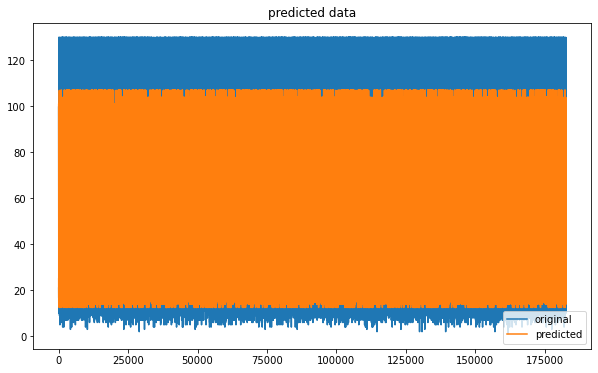

In [89]:
x_ax=range(len(y_test))
plt.plot(x_ax,y_test,label='original')
plt.plot(x_ax,predictions,label='predicted')
plt.title('predicted data')
plt.legend()
plt.show()

In [90]:
train_data

,store,item,sales
date,,,
2013-01-01,1,1,13.0
2013-01-02,1,1,11.0
2013-01-03,1,1,14.0
2013-01-04,1,1,13.0
2013-01-05,1,1,10.0
...,...,...,...
2017-12-27,10,50,63.0
2017-12-28,10,50,59.0
2017-12-29,10,50,74.0


In [91]:
from sklearn import linear_model
lr=linear_model.LinearRegression() 

In [92]:
lrmodel=lr.fit(x_train,y_train)
pred=lrmodel.predict(x_test)

In [93]:
pred

array([51.59077789, 54.34305561, 54.2909152 , ..., 53.68012522,
       51.84403185, 54.17918503])

In [94]:
print("MSE",mean_squared_error(y_test,pred))

MSE 793.6569518460776


In [95]:
from sklearn.metrics import r2_score
r_sq=r2_score(y_test,pred)
r_sq

0.0036191555274804887

In [96]:
train_data

,store,item,sales
date,,,
2013-01-01,1,1,13.0
2013-01-02,1,1,11.0
2013-01-03,1,1,14.0
2013-01-04,1,1,13.0
2013-01-05,1,1,10.0
...,...,...,...
2017-12-27,10,50,63.0
2017-12-28,10,50,59.0
2017-12-29,10,50,74.0


In [97]:
train_data.to_csv('samplesubmission_salesdata.csv',index=False)

In [98]:
sarima_mod6 = sm.tsa.statespace.SARIMAX(train_data.sales, trend='n', order=(6,1,0)).fit()
print(sarima_mod6.summary())


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:               913000
Model:               SARIMAX(6, 1, 0)   Log Likelihood            -3334827.613
Date:                Fri, 07 Oct 2022   AIC                        6669669.226
Time:                        15:56:25   BIC                        6669751.298
Sample:                             0   HQIC                       6669691.895
                             - 913000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8334      0.001  -1133.688      0.000      -0.835      -0.832
ar.L2         -0.7445      0.001   -873.622      0.000      -0.746      -0.743
ar.L3         -0.7251      0.001   -835.078      0.0

In [106]:
sarima_pred=sarima_mod6.predict()
sarima_pred

date
2013-01-01     0.000000
2013-01-02    12.998968
2013-01-03    11.839391
2013-01-04    12.901413
2013-01-05    13.000175
                ...    
2017-12-27    53.065555
2017-12-28    62.788345
2017-12-29    69.764402
2017-12-30    68.430145
2017-12-31    67.849417
Name: predicted_mean, Length: 913000, dtype: float64